###  Importing libraries and EDA of data

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
import seaborn as sns
%matplotlib inline



In [76]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [78]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [79]:
df['Species']=df.Species.str.rsplit('-',expand=True)[1]
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [80]:
df.Species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

In [81]:
df.drop('Id', axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
df.columns = map(str.lower, df.columns)
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


###  Plotting of Data

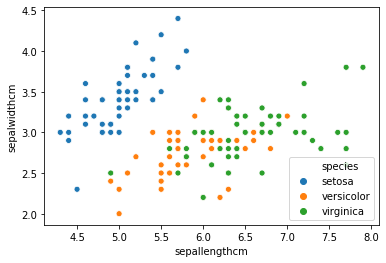

In [83]:
ax1 = sns.scatterplot(  x='sepallengthcm' , y = 'sepalwidthcm', hue = 'species', data =df)


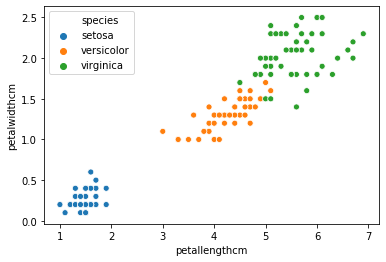

In [84]:
ax2 =sns.scatterplot( x='petallengthcm', y = 'petalwidthcm', hue = 'species', data =df)

### Encoding before Model Training

In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
lb_make = LabelEncoder()
df["Species"] = lb_make.fit_transform(df["species"])
df[["species", "Species"]]
df = df.assign(species=df['Species'])
df.drop(columns=['Species'], inplace=True)
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [86]:
X = df.iloc[:, [0 ,1, 2,3]].values
y = df.iloc[:, 4].values

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0, )
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [88]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


### Accuracy Scores

In [90]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.9736842105263158

In [91]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9736842105263158

In [92]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8947368421052632

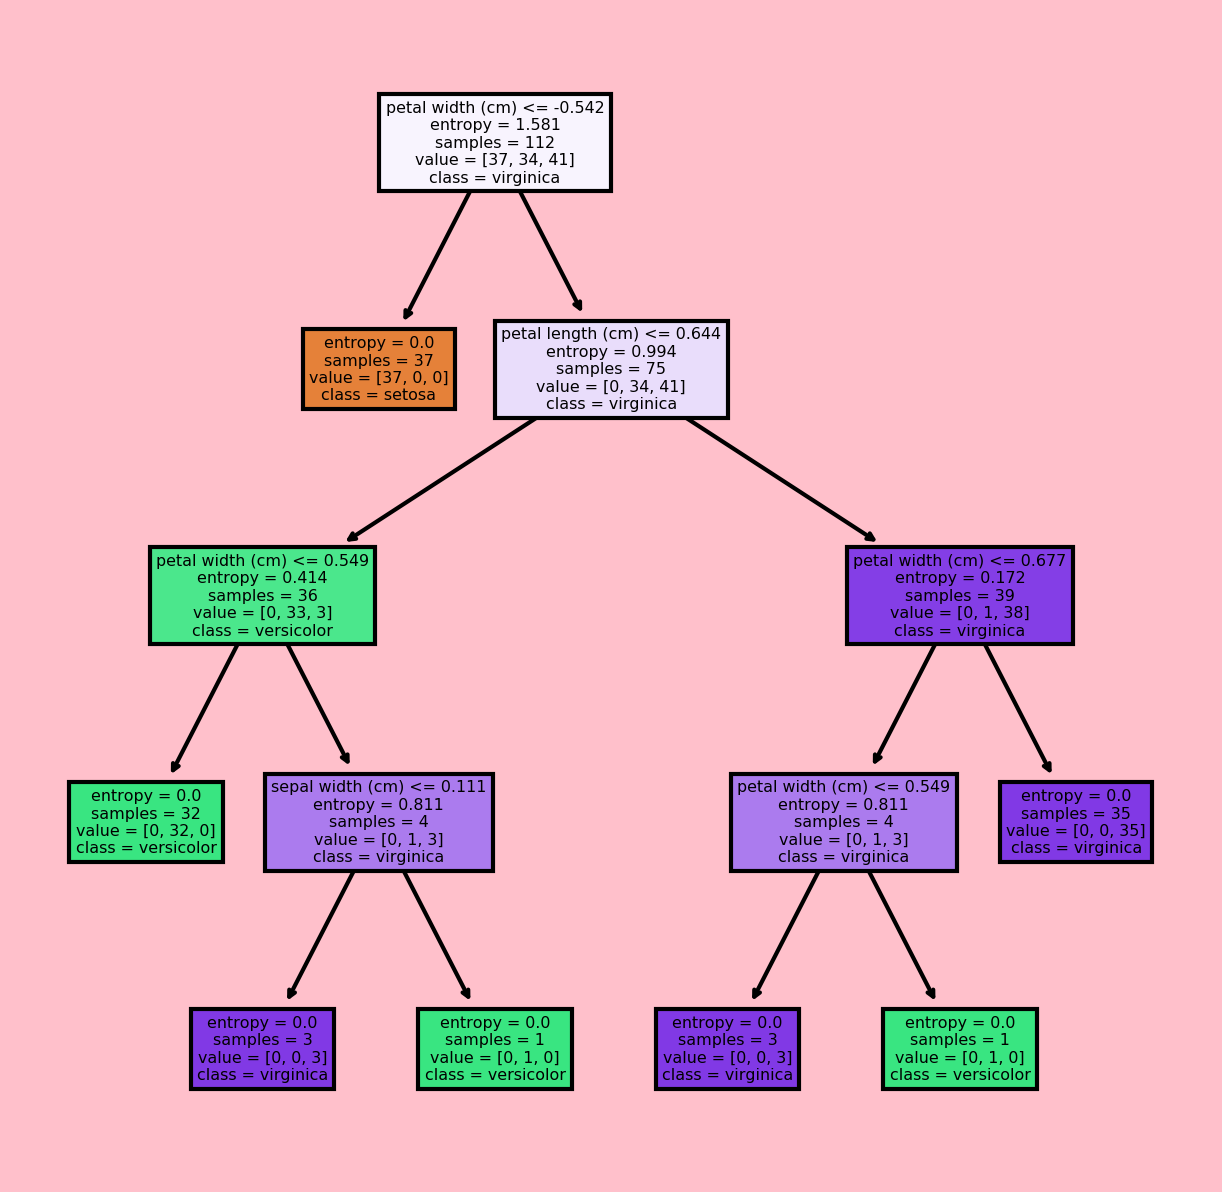

<Figure size 720x576 with 0 Axes>

In [97]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300, facecolor='pink')
mpl.rcParams['text.color'] = 'black'
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(10,8))
from sklearn import tree
tree.plot_tree(classifier,feature_names = fn, 
               class_names=cn,filled=True,ax=axes);

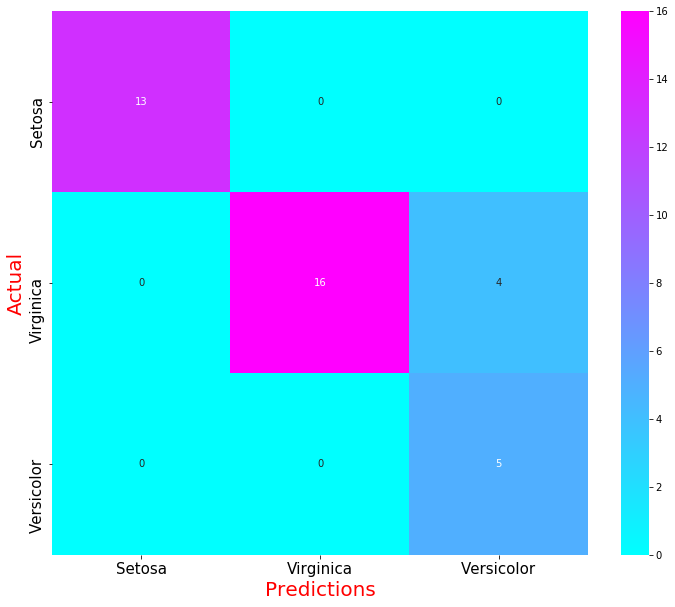

In [107]:
conf_mat=confusion_matrix(y_pred,y_test)
fig=plt.figure(figsize=(12,10))
ax9=fig.add_subplot(111)

sns.heatmap(conf_mat,annot=True,cmap='cool',ax=ax9)
ax9.xaxis.set_ticklabels(['Setosa','Virginica','Versicolor'], size =15 )
ax9.yaxis.set_ticklabels(['Setosa','Virginica','Versicolor'], size =15)
plt.xlabel('Predictions',size=20, color = 'red')
plt.ylabel('Actual',size=20 , color ='red');